In [1]:
using Distributed
procs_to_use = 4
if nprocs() <= procs_to_use
    addprocs(procs_to_use-nprocs())
end
# @everywhere using QuantumStates, OpticalBlochEquations, DifferentialEquations, UnitsToValue, StructArrays, StaticArrays, Parameters, Distributions, ProgressMeter, Plots
@everywhere include("helper_functions.jl")
@everywhere include("define_CaF_SF_cooling.jl")

      From worker 4:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.


      From worker 2:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.
      From worker 3:	WARNING: redefinition of constant QuantumStates.T_kq. This may fail, cause incorrect answers, or produce other errors.


In [2]:
prob_SFcooling.p.add_spontaneous_decay_kick = true
n_trajectories = 10
sols = distributed_solve(n_trajectories, prob_SFcooling, prob_func!, scan_nothing, [0])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:37


1-element Vector{Any}:
 Any[ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Nothing, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, MutableNamedTuple{(:u0, :Γ, :ωs, :ω0s, :eiω0ts, :ϕs, :as, :rs, :kEs, :E_total, :ϵs, :ϵs_scaled, :idxs, :denom, :ψ, :dψ, :ψ_q, :sim_params, :d_ge, :d_eg, :F, :d, :d_exp, :d_exp_split, :r, :r_idx, :v_idx, :F_idx, :n_g, :n_excited, :n_states, :m, :add_terms_dψ, :update_params, :decay_dist, :time_to_decay, :last_decay_time, :n_scatters, :diffusion_constant, :add_spontaneous_decay_kick, :sats), Tuple{Base.RefValue{Vector{Float64}}, Base.RefValue{Float64}, Base.RefValue{MVector{1, Float64}}, Base.RefValue{MVector{16, Float64}}, Base.RefValue{StructVector{ComplexF64, @NamedTuple{re::MVector{16, Float64}, im::MVector{16, Float64}}, Int64}}, Base.RefValue{MMatrix{3, 4, Float64, 12}}, Base.RefValue{StructArray{ComplexF64, 2, @NamedTuple{re::MMatrix{6, 1, Float64, 6}, im::MMatrix{6, 1, F

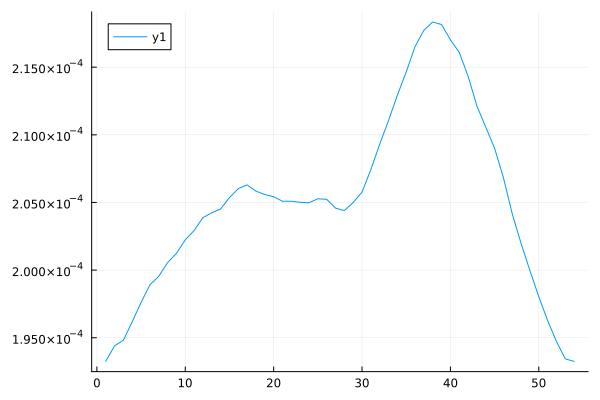

In [6]:
plot(z.(sols[1][1].u))

In [4]:
Tx_fit(sols[1]) |> display
Ty_fit(sols[1]) |> display
Tz_fit(sols[1]) |> display

DomainError: DomainError with -1816.1250579430898:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

In [41]:
T_ensemble_sol(sols[1])

DomainError: DomainError with -20.806121320158027:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

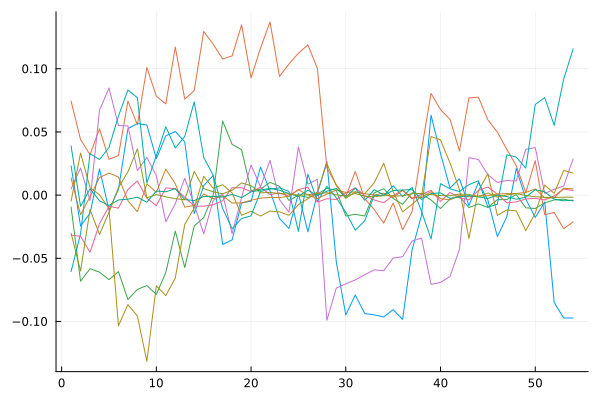

In [7]:
plot()
for i ∈ 1:10
    plot!(vx.(sols[1][i].u))
end
plot!(legend=nothing)